<a href="https://colab.research.google.com/github/Souvik2biswas/Zambia-covid19-omdena/blob/main/zambia_covid19regression_imputed_active_casesopt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
!pip install -q dagshub mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.7/232.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.0/25.0 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 kB 6.

In [ ]:
import dagshub
import mlflow
dagshub.init(repo_owner='Omdena', repo_name='KitweChapter_ForecastingCOVID19Dynamics', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=9f08eae7-4cca-4266-af56-1080b1c75cf0&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e28a54b43805c16324f5b31520bfbc7a56c0eab4218280c6608a87098ade3dd0




Initialized MLflow to track repo "Omdena/KitweChapter_ForecastingCOVID19Dynamics"

Repository Omdena/KitweChapter_ForecastingCOVID19Dynamics initialized!

In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
import optuna

optuna.__version__

'3.6.1'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Dataset

In [ ]:
# Read the dataset
df = pd.read_csv('https://dagshub.com/Omdena/KitweChapter_ForecastingCOVID19Dynamics/raw/3a90494983d48b8b16cf9ad0bf31a7be4ae42a2e/preprocessed_data_updated.csv', parse_dates=['Unnamed: 0'])
df

,Unnamed: 0,1 confirmed per every,1 died per every,"Affected population, %",Confirmed per 1000,"Daily growth, %",Died per 1000,Merged_Case_Fatality_Ratio,Merged_Incident_Rate,aged_65_older,...,vaccinated24hours,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q
0,2020-01-05,457974.0,17861000.0,0.000218,0.002184,8.333333,0.000056,0.662252,5.749579,2.48,...,0.0,77.266073,83.418344,254.832129,238.946227,490.050145,562.00689,95.184301,107.705153,87.734354
1,2020-01-06,457974.0,17861000.0,0.000218,0.002184,8.333333,0.000056,0.662252,5.749579,2.48,...,0.0,77.266073,83.418344,254.832129,238.946227,490.050145,562.00689,95.184301,107.705153,87.734354
2,2020-01-07,457974.0,17861000.0,0.000218,0.002184,8.333333,0.000056,0.662252,5.749579,2.48,...,0.0,77.266073,83.418344,254.832129,238.946227,490.050145,562.00689,95.184301,107.705153,87.734354
3,2020-01-08,457974.0,17861000.0,0.000218,0.002184,8.333333,0.000056,0.662252,5.749579,2.48,...,0.0,77.266073,83.418344,254.832129,238.946227,490.050145,562.00689,95.184301,107.705153,87.734354
4,2020-01-09,457974.0,17861000.0,0.000218,0.002184,8.333333,0.000056,0.662252,5.749579,2.48,...,0.0,77.266073,83.418344,254.832129,238.946227,490.050145,562.00689,95.184301,107.705153,87.734354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564,2024-04-17,53.0,4417.0,1.904552,19.045518,0.065598,0.226415,1.182333,1866.491630,2.48,...,1840.0,13.921635,11.281279,77.256116,68.192398,302.102299,451.73312,115.139760,109.443896,63.140370
1565,2024-04-18,53.0,4417.0,1.904552,19.045518,0.065598,0.226415,1.182333,1866.491630,2.48,...,1840.0,13.158919,11.021232,75.794481,65.596989,299.551575,446.44366,111.885462,112.033635,63.277081
1566,2024-04-19,53.0,4417.0,1.904552,19.045518,0.065598,0.226415,1.182333,1866.491630,2.48,...,1840.0,12.396204,10.761185,74.332846,63.001579,297.000851,441.15420,108.631164,114.623375,63.413791
1567,2024-04-20,53.0,4417.0,1.904552,19.045518,0.065598,0.226415,1.182333,1866.491630,2.48,...,1840.0,11.633488,10.501138,72.871211,60.406170,294.450126,435.86474,105.376867,117.213115,63.550502


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1569 entries, 0 to 1568
Data columns (total 68 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Unnamed: 0                                  1569 non-null   datetime64[ns]
 1   1 confirmed per every                       1569 non-null   float64       
 2   1 died per every                            1569 non-null   float64       
 3   Affected population, %                      1569 non-null   float64       
 4   Confirmed per 1000                          1569 non-null   float64       
 5   Daily growth, %                             1569 non-null   float64       
 6   Died per 1000                               1569 non-null   float64       
 7   Merged_Case_Fatality_Ratio                  1569 non-null   float64       
 8   Merged_Incident_Rate                        1569 non-null   float64       
 9   aged_65_

# EDA

In [ ]:
# Clean feature names
df.columns = df.columns.str.replace(' ', '_').str.replace('[^A-Za-z0-9_]', '', regex=True)

In [ ]:
plt.figure(figsize=(20, 15), dpi=70)
#increase dpi for clear visualization
# Draw the heatmap
g = sns.heatmap(df.corr(), cbar = True, annot=True, annot_kws={'size': 4}, square = True, cmap='coolwarm', linewidths=.5, linecolor="k")
g.set_xticklabels(rotation=90, labels = df.columns, size = 10)
g.set_yticklabels(rotation=0, labels = df.columns, size = 10)

# Show the plot
plt.show()

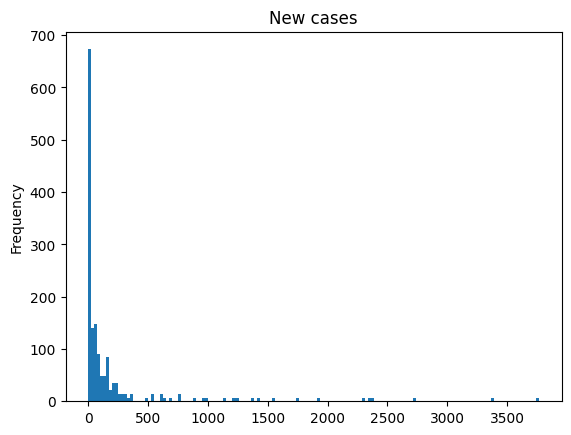

In [ ]:
df['new_cases_smoothed'].plot(kind='hist', bins=150, title='New cases')
plt.gca().spines[['top', 'right',]].set_visible(True)

# Train-Test Split

In [ ]:
X=df[["positive_rate","testsPositivity","new_tests_smoothed","new_deaths_smoothed","test24hours","stringency_index","rfh_avg","r1h_avg","r3h_avg"]]
y=df["imputed_active_cases"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [ ]:
len(X_train),len(y_train)

(1255, 1255)

In [ ]:
len(X_test),len(y_test)

(314, 314)

In [ ]:
ts_cv = TimeSeriesSplit(
    n_splits=3,
    max_train_size=1255,
    test_size=314,
)

# Extreme Gradient Boosting Model

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb

def objective(trial):
      n_estimators = trial.suggest_int("n_estimators", 50, 500)
      learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.1, log=True)
      max_depth = trial.suggest_int("max_depth", 3, 15)
      min_child_weight = trial.suggest_int("min_child_weight", 1, 5)
      subsample = trial.suggest_float("subsample", 0.8, 1.0)
      colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)

      xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                  n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  max_depth = max_depth,
                                  min_child_weight = min_child_weight,
                                  subsample = subsample,
                                  colsample_bytree = colsample_bytree)  # Define the model.

      score = sklearn.model_selection.cross_val_score(xgb_model, X_train, y_train, n_jobs=-1, cv= ts_cv, scoring = 'neg_mean_squared_error').mean()  # Train and evaluate the model.

      return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=1000)

[I 2024-06-06 15:25:03,625] A new study created in memory with name: no-name-d50e116f-6a81-4907-9eab-a76e05fdcc7e
[I 2024-06-06 15:25:07,491] Trial 0 finished with value: -4080227.5401906003 and parameters: {'n_estimators': 331, 'learning_rate': 0.004000912163440542, 'max_depth': 13, 'min_child_weight': 2, 'subsample': 0.8573783850005579, 'colsample_bytree': 0.615009959954231}. Best is trial 0 with value: -4080227.5401906003.
[I 2024-06-06 15:25:07,800] Trial 1 finished with value: -841830.6746990737 and parameters: {'n_estimators': 174, 'learning_rate': 0.08360262823492598, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 0.9994235748235059, 'colsample_bytree': 0.9141638521107959}. Best is trial 1 with value: -841830.6746990737.
[I 2024-06-06 15:25:08,115] Trial 2 finished with value: -6401481.304989492 and parameters: {'n_estimators': 218, 'learning_rate': 0.004411639618273928, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.910139527732635, 'colsample_bytree': 0.65073303136

In [ ]:
best_params = study.best_params
best_params

{'n_estimators': 356,
 'learning_rate': 0.08038508454625831,
 'max_depth': 5,
 'min_child_weight': 2,
 'subsample': 0.8561877395439574,
 'colsample_bytree': 0.93955496403874}

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
best_min_child_weight = best_params['min_child_weight']
best_subsample = best_params['subsample']
best_colsample_bytree = best_params['colsample_bytree']

In [ ]:
best_xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                  n_estimators = best_n_estimators,
                                  learning_rate = best_learning_rate,
                                  max_depth = best_max_depth,
                                  min_child_weight = best_min_child_weight,
                                  subsample = best_subsample,
                                  colsample_bytree = best_colsample_bytree)

best_xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.93955496403874, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08038508454625831, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=356, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = best_xgb_model.predict(X_test)
y_pred

array([8.31206741e+01, 1.75182587e+02, 2.47736890e+03, 4.98753448e+02,
       1.81888138e+02, 1.76891754e+02, 2.07182419e+02, 1.18706958e+03,
       8.74122162e+01, 8.30220020e+03, 5.11817932e+00, 2.70294580e+03,
       3.93168664e+00, 1.79835464e+02, 1.75108871e+02, 1.11583350e+03,
       1.24386604e+02, 2.93971405e+02, 8.42899017e+01, 4.88657562e+02,
       3.41344309e+00, 8.47864761e+01, 8.49395142e+01, 3.41344309e+00,
       4.66854515e+01, 3.36537354e+02, 1.57635413e+03, 5.82952271e+02,
       4.72439697e+02, 5.14733704e+02, 1.75182587e+02, 1.72304062e+02,
       3.70575513e+03, 5.68365967e+02, 3.96776848e+01, 5.57899902e+02,
       5.29316895e+03, 2.58615662e+02, 2.15150803e+02, 1.98944495e+03,
       2.45421094e+03, 1.92937793e+04, 6.38424866e+02, 7.08635101e+01,
       8.53043594e+01, 1.87349255e+03, 1.28939233e+03, 9.91938904e+02,
       1.51663098e+03, 8.05396805e+01, 3.35147119e+00, 1.87074699e+01,
       3.96241846e+03, 2.07182419e+02, 1.05226738e+04, 7.87144226e+02,
      

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

322.1841093287983

In [ ]:
R2_score = r2_score(y_pred,y_test)
R2_score

0.9916384890133407

In [ ]:
MAPE = mean_absolute_percentage_error(y_pred, y_test)
MAPE

0.1649414907372247

In [ ]:
with mlflow.start_run(run_name='Team-1 XGBoost Model'):
    mlflow.log_params(best_xgb_model.get_params())
    mlflow.log_metric('RMSE', RMSE)
    mlflow.log_metric('R2 Score', R2_score)
    mlflow.log_metric('MAPE', MAPE)

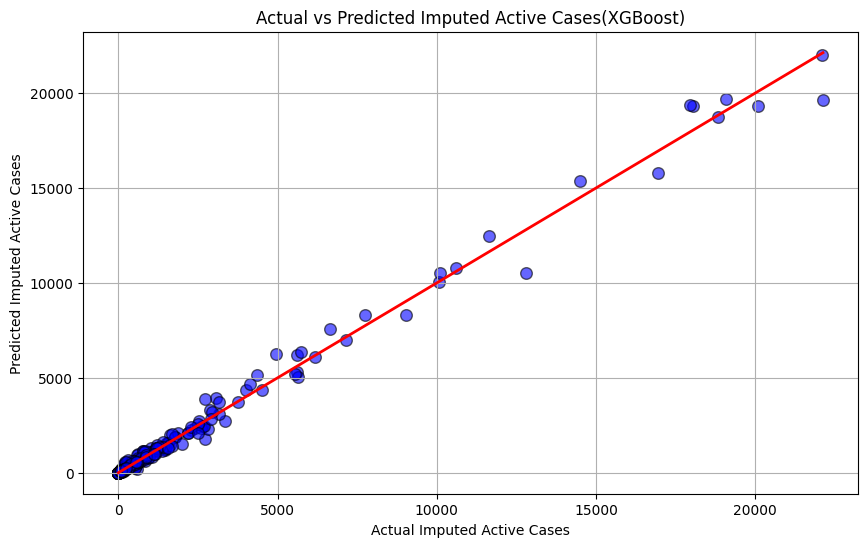

In [ ]:
# Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Imputed Active Cases')
plt.ylabel('Predicted Imputed Active Cases')
plt.title('Actual vs Predicted Imputed Active Cases(XGBoost)')
plt.grid(True)
plt.show()

In [ ]:
np.where(y_pred <= 0)[0]

array([], dtype=int64)

In [ ]:
y_pred[y_pred <= 0]

array([], dtype=float32)

# Random Forest Regressor Model

In [ ]:
def objective(trial):
      bootstrap = trial.suggest_categorical("bootstrap", [True, False])
      n_estimators = trial.suggest_int("n_estimators", 50, 500)
      min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5)
      max_depth = trial.suggest_int("max_depth", 2, 32)
      min_samples_split = trial.suggest_int("min_samples_split", 2, 5)
      min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 5)
      random_state = trial.suggest_int("random_state", 0, 150)
      warm_start = trial.suggest_categorical("warm_start", [True, False])

      rfr_model = RandomForestRegressor(criterion='squared_error',
                                  bootstrap = bootstrap,
                                  n_estimators = n_estimators,
                                  min_weight_fraction_leaf = min_weight_fraction_leaf,
                                  max_depth = max_depth,
                                  min_samples_split = min_samples_split,
                                  min_samples_leaf = min_samples_leaf,
                                  random_state = random_state,
                                  warm_start = warm_start)  # Define the model.

      score = sklearn.model_selection.cross_val_score(rfr_model, X_train, y_train, n_jobs=-1, cv= ts_cv, scoring = 'neg_mean_squared_error').mean()  # Train and evaluate the model.

      return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=700)

[I 2024-06-06 15:45:57,356] A new study created in memory with name: no-name-c337973b-ef0c-4062-9b66-331570f17ad8
[I 2024-06-06 15:45:57,726] Trial 0 finished with value: -19082358.204707403 and parameters: {'bootstrap': True, 'n_estimators': 53, 'min_weight_fraction_leaf': 0.4751011503840516, 'max_depth': 31, 'min_samples_split': 3, 'min_samples_leaf': 3, 'random_state': 132, 'warm_start': False}. Best is trial 0 with value: -19082358.204707403.
[I 2024-06-06 15:46:00,157] Trial 1 finished with value: -8062459.82146274 and parameters: {'bootstrap': True, 'n_estimators': 385, 'min_weight_fraction_leaf': 0.08071275598825017, 'max_depth': 14, 'min_samples_split': 4, 'min_samples_leaf': 1, 'random_state': 61, 'warm_start': True}. Best is trial 1 with value: -8062459.82146274.
[I 2024-06-06 15:46:00,668] Trial 2 finished with value: -15518724.323075479 and parameters: {'bootstrap': True, 'n_estimators': 102, 'min_weight_fraction_leaf': 0.2589824193346414, 'max_depth': 21, 'min_samples_spli

In [ ]:
best_params = study.best_params
best_params

{'bootstrap': False,
 'n_estimators': 287,
 'min_weight_fraction_leaf': 0.0009731341381188837,
 'max_depth': 11,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'random_state': 102,
 'warm_start': True}

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
best_bootstrap = best_params['bootstrap']
best_n_estimators = best_params['n_estimators']
best_min_weight_fraction_leaf = best_params['min_weight_fraction_leaf']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']
best_random_state = best_params['random_state']
best_warm_start = best_params['warm_start']

In [ ]:
best_rfr_model = RandomForestRegressor(criterion='squared_error',
                                  bootstrap = best_bootstrap,
                                  n_estimators = best_n_estimators,
                                  min_weight_fraction_leaf = best_min_weight_fraction_leaf,
                                  max_depth = best_max_depth,
                                  min_samples_split = best_min_samples_split,
                                  min_samples_leaf = best_min_samples_leaf,
                                  random_state = best_random_state,
                                  warm_start = best_warm_start)

best_rfr_model.fit(X_train, y_train)

In [ ]:
y_pred = best_rfr_model.predict(X_test)
y_pred

array([8.30000000e+01, 3.94500000e+02, 2.84050000e+03, 5.80583333e+02,
       2.06000000e+02, 1.79000000e+02, 2.06000000e+02, 1.68700000e+03,
       8.30000000e+01, 8.63996167e+03, 2.00000000e+00, 3.97486411e+03,
       2.00000000e+00, 1.32000000e+02, 1.79000000e+02, 1.08900000e+03,
       9.44000000e+01, 4.94130435e+02, 8.30000000e+01, 4.94130435e+02,
       2.00000000e+00, 8.30000000e+01, 8.30000000e+01, 2.00000000e+00,
       6.23301394e+01, 2.42750000e+02, 1.52650000e+03, 4.94130435e+02,
       4.38336818e+02, 4.16500000e+02, 3.94500000e+02, 1.79000000e+02,
       4.41842334e+03, 5.80583333e+02, 5.52500000e+01, 3.76136364e+02,
       5.39000000e+03, 2.80000000e+02, 2.06000000e+02, 1.62766667e+03,
       1.33200000e+03, 2.12440906e+04, 8.24333333e+02, 8.30000000e+01,
       8.30000000e+01, 1.84400000e+03, 1.16550000e+03, 4.56500000e+02,
       1.57371429e+03, 8.30000000e+01, 2.00000000e+00, 2.47500000e+01,
       2.94755052e+03, 2.06000000e+02, 1.02256667e+04, 9.89500000e+02,
      

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

In [ ]:
R2_score=r2_score(y_pred,y_test)
R2_score

0.9767661273512733

In [ ]:
MAPE = mean_absolute_percentage_error(y_pred, y_test)
MAPE

0.15459437531227654

In [ ]:
with mlflow.start_run(run_name='Team-1 Random Forest Model'):
    mlflow.log_params(study.best_params)
    mlflow.log_metric('RMSE', RMSE)
    mlflow.log_metric('R2 Score', R2_score)
    mlflow.log_metric('MAPE', MAPE)

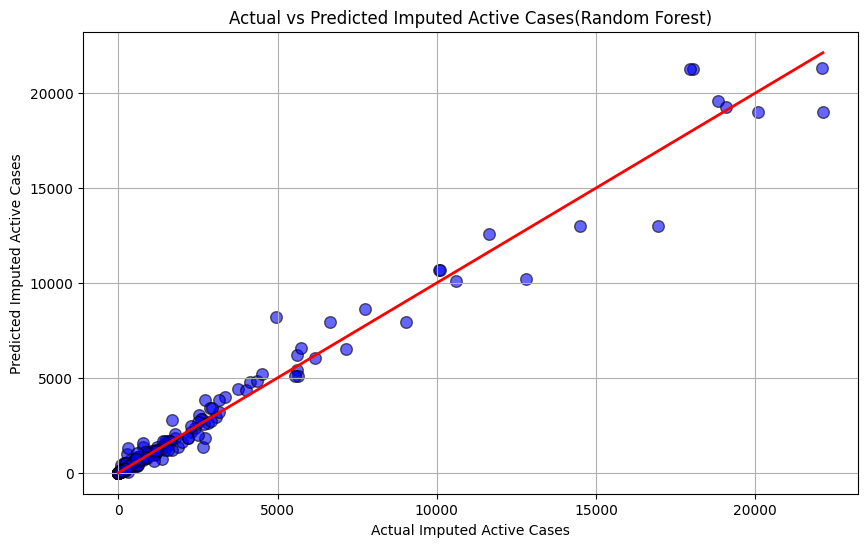

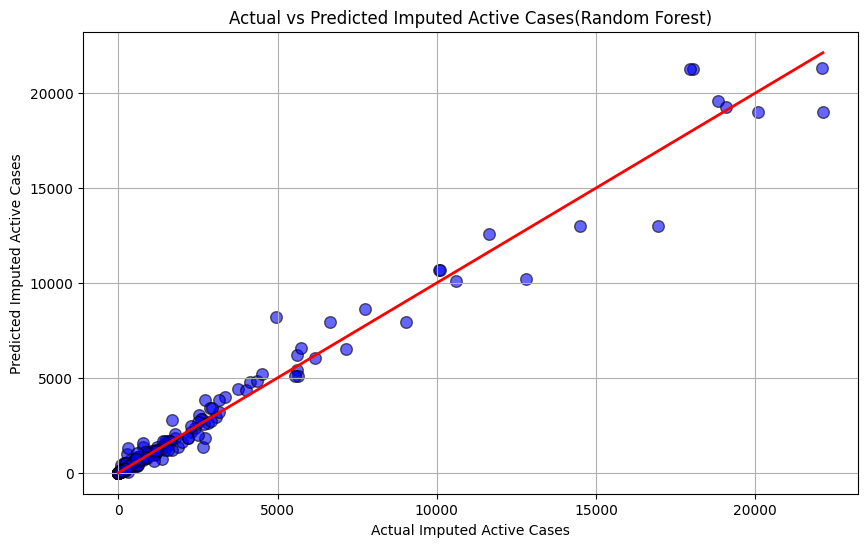

In [ ]:
# Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Imputed Active Cases')
plt.ylabel('Predicted Imputed Active Cases')
plt.title('Actual vs Predicted Imputed Active Cases(Random Forest)')
plt.grid(True)
plt.show()


# Light Gradient Boosing Machine Model

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMRegressor

def objective(trial):
      boosting_type = trial.suggest_categorical("boosting_type", ['gbdt', 'dart'])
      n_estimators = trial.suggest_int("n_estimators", 50, 500)
      learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.1, log=True)
      max_depth = trial.suggest_int("max_depth", 3, 15)
      num_leaves = trial.suggest_int("num_leaves", 2, 1e+4)
      random_state = trial.suggest_int("random_state", 1, 100)
      colsample_bytree = trial.suggest_float("colsample_bytree", 0.5, 1.0)
      min_child_weight = trial.suggest_float("min_child_weight", 0.001, 1)
      min_child_samples = trial.suggest_int("min_child_samples", 10, 1000)

      gbm_model = LGBMRegressor(objective='mean_squared_error', force_col_wise=True,
                                  boosting_type = boosting_type,
                                  n_estimators = n_estimators,
                                  learning_rate = learning_rate,
                                  max_depth = max_depth,
                                  num_leaves = num_leaves,
                                  random_state = random_state,
                                  colsample_bytree = colsample_bytree,
                                  min_child_weight = min_child_weight,
                                  min_child_samples = min_child_samples)  # Define the model.

      score = sklearn.model_selection.cross_val_score(gbm_model, X_train, y_train, n_jobs=-1, cv= ts_cv, scoring = 'neg_mean_squared_error').mean()  # Train and evaluate the model.

      return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2024-06-06 16:26:55,715] A new study created in memory with name: no-name-fcff271c-affb-4b38-91e0-69337a5e33fa
[I 2024-06-06 16:27:02,109] Trial 0 finished with value: -21254342.788757462 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 485, 'learning_rate': 0.057112830781936866, 'max_depth': 5, 'num_leaves': 6227, 'random_state': 96, 'colsample_bytree': 0.8981878107439019, 'min_child_weight': 0.39858940341089893, 'min_child_samples': 387}. Best is trial 0 with value: -21254342.788757462.
[I 2024-06-06 16:27:02,231] Trial 1 finished with value: -22994942.129018117 and parameters: {'boosting_type': 'gbdt', 'n_estimators': 137, 'learning_rate': 0.02303244139988644, 'max_depth': 13, 'num_leaves': 6718, 'random_state': 31, 'colsample_bytree': 0.6892059928955242, 'min_child_weight': 0.46205008950289195, 'min_child_samples': 910}. Best is trial 0 with value: -21254342.788757462.
[I 2024-06-06 16:27:04,230] Trial 2 finished with value: -23405421.50311993 and parameters: {'boosting

In [ ]:
best_params = study.best_params
best_params

{'boosting_type': 'gbdt',
 'n_estimators': 284,
 'learning_rate': 0.09843875968297593,
 'max_depth': 15,
 'num_leaves': 6099,
 'random_state': 11,
 'colsample_bytree': 0.7492040281381288,
 'min_child_weight': 0.8459088003610464,
 'min_child_samples': 10}

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
best_boosting_type = best_params['boosting_type']
best_n_estimators = best_params['n_estimators']
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']
best_num_leaves = best_params['num_leaves']
best_mrandom_state = best_params['random_state']
best_colsample_bytree = best_params['colsample_bytree']
best_min_child_weight = best_params['min_child_weight']
best_min_child_samples = best_params['min_child_samples']

In [ ]:
best_gbm_model = LGBMRegressor(objective='mean_squared_error', force_col_wise=True,
                                  boosting_type = best_boosting_type,
                                  n_estimators = best_n_estimators,
                                  learning_rate = best_learning_rate,
                                  max_depth = best_max_depth,
                                  num_leaves = best_num_leaves,
                                  random_state = best_random_state,
                                  colsample_bytree = best_colsample_bytree,
                                  min_child_weight = best_min_child_weight,
                                  min_child_samples = best_min_child_samples)

best_gbm_model.fit(X_train, y_train)

[LightGBM] [Info] Total Bins 1601
[LightGBM] [Info] Number of data points in the train set: 1255, number of used features: 9
[LightGBM] [Info] Start training from score 1810.091235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

LGBMRegressor(colsample_bytree=0.7492040281381288, force_col_wise=True,
              learning_rate=0.09843875968297593, max_depth=15,
              min_child_samples=10, min_child_weight=0.8459088003610464,
              n_estimators=284, num_leaves=6099, objective='mean_squared_error',
              random_state=102)

In [ ]:
y_pred = best_gbm_model.predict(X_test)
y_pred

array([ 8.33474684e+01,  2.05665221e+02,  2.53988422e+03,  5.03443576e+02,
        1.99696233e+02,  1.75114067e+02,  1.97801252e+02,  1.29385567e+03,
        8.18480880e+01,  9.07187871e+03,  3.40884731e+00,  2.70952114e+03,
        1.36183997e+01,  1.15324042e+02,  1.78950108e+02,  1.05794466e+03,
        9.02519033e+01,  4.67491397e+02,  8.06638870e+01,  4.53842667e+02,
        3.10896660e+00,  8.76412205e+01,  8.44955330e+01,  3.10896660e+00,
        6.43359587e+01,  2.41453687e+02,  1.71996007e+03,  6.08012493e+02,
        4.47393783e+02,  4.58339076e+02,  2.38899102e+02,  1.76226011e+02,
        3.40274204e+03,  5.78418156e+02,  3.53815544e+01,  5.47568835e+02,
        5.18776441e+03,  2.37226386e+02,  2.10512861e+02,  4.59819273e+03,
        2.92775549e+03,  1.82296685e+04,  8.26370629e+02,  7.20328249e+01,
        8.50512284e+01,  1.74652261e+03,  4.05706412e+03,  8.87510966e+02,
        1.46007140e+03,  8.33637537e+01, -6.46385747e+00,  3.58892770e+01,
        4.52692651e+03,  

In [ ]:
RMSE = np.sqrt(mean_squared_error(y_pred,y_test))
RMSE

516.8028174315331

In [ ]:
R2_score=r2_score(y_pred,y_test)
R2_score

0.9766198014726547

In [ ]:
MAPE = mean_absolute_percentage_error(y_pred, y_test)
MAPE

0.26434224086074487

In [ ]:
with mlflow.start_run(run_name='Team-1 Light GBM Model'):
    mlflow.log_params(study.best_params)
    mlflow.log_metric('RMSE', RMSE)
    mlflow.log_metric('R2 Score', R2_score)
    mlflow.log_metric('MAPE', MAPE)

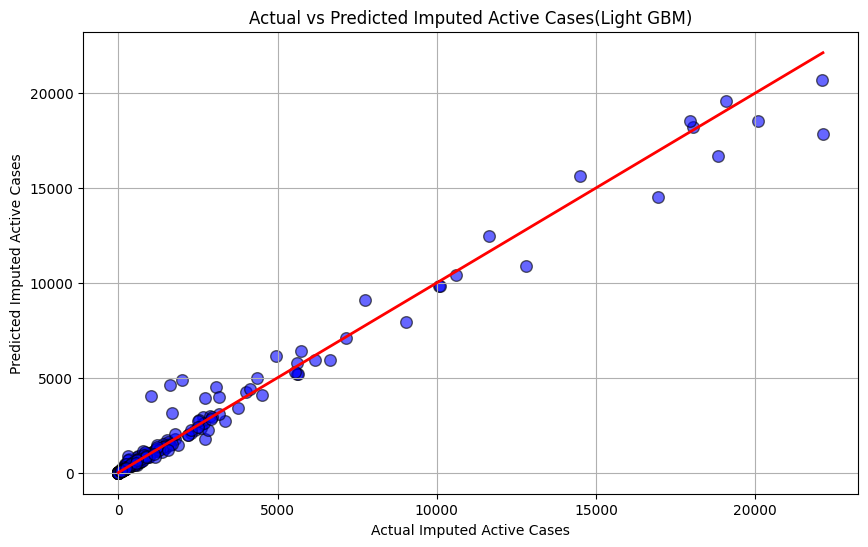

In [ ]:
# Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Imputed Active Cases')
plt.ylabel('Predicted Imputed Active Cases')
plt.title('Actual vs Predicted Imputed Active Cases(Light GBM)')
plt.grid(True)
plt.show()


# CatBoost Regressor Model


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor

def objective(trial):
      l2_leaf_reg = trial.suggest_int("l2_leaf_reg", 1, 5)
      learning_rate = trial.suggest_float("learning_rate", 1e-4, 0.1, log=True)
      depth = trial.suggest_int("depth", 3, 10)
      iterations = trial.suggest_int("iterations", 100, 400)

      cat_model = CatBoostRegressor(iterations = iterations,
                                  l2_leaf_reg = l2_leaf_reg,
                                  learning_rate = learning_rate,
                                  depth = depth)  # Define the model.

      score = sklearn.model_selection.cross_val_score(cat_model, X_train, y_train, n_jobs=-1, cv= ts_cv, scoring = 'neg_mean_squared_error').mean()  # Train and evaluate the model.

      return score

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

[I 2024-06-06 16:37:20,698] A new study created in memory with name: no-name-8272474d-1bf5-45a1-9023-94696235e19d
[I 2024-06-06 16:37:26,109] Trial 0 finished with value: -871450.5253557245 and parameters: {'l2_leaf_reg': 5, 'learning_rate': 0.04613450691140134, 'depth': 7, 'iterations': 288}. Best is trial 0 with value: -871450.5253557245.
[I 2024-06-06 16:37:34,559] Trial 1 finished with value: -749348.9669794099 and parameters: {'l2_leaf_reg': 4, 'learning_rate': 0.07830620216129672, 'depth': 9, 'iterations': 224}. Best is trial 1 with value: -749348.9669794099.
[I 2024-06-06 16:37:40,012] Trial 2 finished with value: -850522.5775592328 and parameters: {'l2_leaf_reg': 3, 'learning_rate': 0.046590891422652825, 'depth': 7, 'iterations': 191}. Best is trial 1 with value: -749348.9669794099.
[I 2024-06-06 16:37:42,791] Trial 3 finished with value: -17185183.911975782 and parameters: {'l2_leaf_reg': 2, 'learning_rate': 0.0012805078210939753, 'depth': 6, 'iterations': 190}. Best is trial 

In [ ]:
best_params = study.best_params
best_params

{'l2_leaf_reg': 1,
 'learning_rate': 0.07589670353596856,
 'depth': 4,
 'iterations': 332}

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_param_importances(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
best_iterations = best_params['iterations']
best_l2_leaf_reg = best_params['l2_leaf_reg']
best_learning_rate = best_params['learning_rate']
best_depth = best_params['depth']

In [ ]:
best_cat_model = CatBoostRegressor(iterations = best_iterations,
                                  l2_leaf_reg = best_l2_leaf_reg,
                                  learning_rate = best_learning_rate,
                                  depth = best_depth)

best_cat_model.fit(X_train, y_train)

0:	learn: 4226.0954757	total: 48.1ms	remaining: 15.9s
1:	learn: 3960.7321387	total: 51.7ms	remaining: 8.53s
2:	learn: 3711.8558307	total: 53.7ms	remaining: 5.88s
3:	learn: 3478.0904627	total: 56.3ms	remaining: 4.62s
4:	learn: 3255.3582848	total: 58.8ms	remaining: 3.85s
5:	learn: 3055.1944633	total: 61.9ms	remaining: 3.37s
6:	learn: 2869.5193706	total: 63.6ms	remaining: 2.95s
7:	learn: 2707.3381192	total: 66.3ms	remaining: 2.69s
8:	learn: 2538.0555755	total: 69.1ms	remaining: 2.48s
9:	learn: 2395.4572685	total: 70.7ms	remaining: 2.28s
10:	learn: 2252.9376257	total: 73.5ms	remaining: 2.14s
11:	learn: 2128.0895628	total: 75.8ms	remaining: 2.02s
12:	learn: 2003.0373856	total: 78.6ms	remaining: 1.93s
13:	learn: 1895.3537613	total: 80.9ms	remaining: 1.84s
14:	learn: 1788.0348574	total: 83.9ms	remaining: 1.77s
15:	learn: 1689.4651708	total: 86.4ms	remaining: 1.71s
16:	learn: 1601.0868429	total: 89.6ms	remaining: 1.66s
17:	learn: 1511.5890047	total: 91.3ms	remaining: 1.59s
18:	learn: 1428.8891

In [ ]:
y_pred = best_cat_model.predict(X_test)
y_pred

array([ 4.67735960e+01,  2.67030749e+02,  2.29496957e+03,  5.62984246e+02,
        1.71037247e+02,  2.13409221e+02,  1.41873185e+02,  9.76995717e+02,
        6.61870860e+01,  8.43856341e+03,  1.59485291e+01,  2.76370815e+03,
        1.90510925e+01,  2.12462746e+02,  2.08812102e+02,  1.01056894e+03,
        1.79090143e+02,  3.80476736e+02,  9.34596018e+01,  5.58098493e+02,
       -8.92953566e-01,  6.60940285e+01,  4.43041122e+01, -8.92953566e-01,
        2.62367699e+01,  3.22245593e+02,  1.52137260e+03,  7.36411258e+02,
        5.93685825e+02,  6.51695298e+02,  2.67030749e+02,  1.95475566e+02,
        3.71478182e+03,  5.24202473e+02,  7.08758293e+01,  5.88945745e+02,
        5.07319520e+03,  3.56878784e+02,  2.67491822e+02,  1.16485130e+03,
        2.35704048e+03,  2.31610395e+04,  6.04059914e+02,  1.28539835e+02,
        8.98168032e+01,  1.77180428e+03,  9.29841824e+02,  1.50914400e+03,
        1.47944680e+03,  4.67735960e+01,  1.77593876e+01,  4.13408292e+00,
        4.05340924e+03,  

In [ ]:
RMSE

516.8028174315331

In [ ]:
R2_score

0.9766198014726547

In [ ]:
MAPE

0.26434224086074487

In [ ]:
with mlflow.start_run(run_name='Team-1 CatBoost Model'):
    mlflow.log_params(study.best_params)
    mlflow.log_metric('RMSE', RMSE)
    mlflow.log_metric('R2 Score', R2_score)
    mlflow.log_metric('MAPE', MAPE)

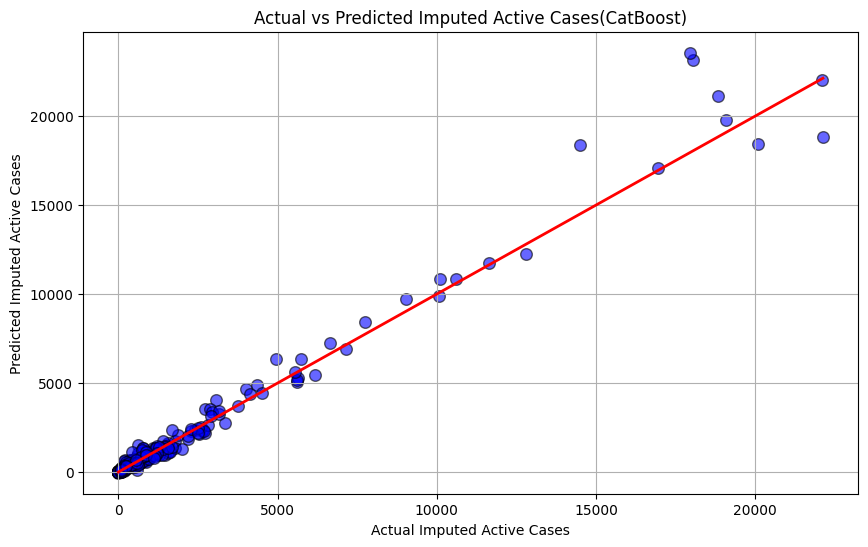

In [ ]:
# Visualize the actual vs. predicted data points
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolors='k', alpha=0.6, s=70)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)

plt.xlabel('Actual Imputed Active Cases')
plt.ylabel('Predicted Imputed Active Cases')
plt.title('Actual vs Predicted Imputed Active Cases(CatBoost)')
plt.grid(True)
plt.show()